In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVR
import scipy.stats as stats 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import learning_curve

In [5]:
data = pd.read_excel('Feb.xlsx')
data.head()

,Timestamp,Surface Temperature (°C) \nDRS511 1,Surface Temperature (°C) \nDRS511 2,Surface Temperature (°C) \nDSC/DST,Surface State \nDRS511 1,Surface State \nDRS511 2,Surface State \nDSC/DST,Air Temperature (°C) \nAtmospheric site,Dew Point Temperature (°C) \nAtmospheric site,Level of grip \nDSC/DST,...,Base Temperature (°C) \nDRS511 1,Liquid Freezing Temperature (°C) \nDRS511 1,Liquid Freezing Temperature (°C) \nDRS511 2,Ground Temperature (°C) \nDRS511 1,Ground Temperature (°C) \nDRS511 2,Freezing Temperature (°C) \nDRS511 1,Freezing Temperature (°C) \nDRS511 2,Max Wind Speed (m/s) \nAtmospheric site,Water Thickness (mm) \nDRS511 1,Water Thickness (mm) \nDRS511 2
0,01.02.2019 00:00,-3.7,-3.7,-3.8,trace,trace,wet,-2.6,-4.3,0.8,...,-3.2,-0.3,-1.6,-3.7,-3.8,-0.8,-1.6,4.8,0.09,0.0
1,01.02.2019 00:10,-3.7,-3.7,-3.8,trace,trace,wet,-2.5,-4.2,0.8,...,-3.3,-0.3,-1.6,-3.7,-3.8,-0.8,-1.6,4.5,0.09,0.0
2,01.02.2019 00:20,-3.6,-3.6,-3.8,trace,trace,wet,-2.5,-4.1,0.8,...,-3.3,-0.3,-1.6,-3.7,-3.7,-0.8,-1.6,4.0,0.09,0.0
3,01.02.2019 00:30,-3.4,-3.5,-3.6,trace,trace,wet,-2.4,-4.0,0.8,...,-3.3,-0.3,-1.5,-3.7,-3.7,-0.8,-1.5,4.1,0.09,0.0
4,01.02.2019 00:40,-3.5,-3.5,-3.6,trace,trace,wet,-2.3,-3.9,0.8,...,-3.3,-0.3,-1.5,-3.6,-3.7,-0.8,-1.5,3.6,0.09,0.0


In [6]:
data.rename(index=data.Timestamp, inplace=True)
data.drop('Timestamp', axis=1, inplace=True)
data.head()

,Surface Temperature (°C) \nDRS511 1,Surface Temperature (°C) \nDRS511 2,Surface Temperature (°C) \nDSC/DST,Surface State \nDRS511 1,Surface State \nDRS511 2,Surface State \nDSC/DST,Air Temperature (°C) \nAtmospheric site,Dew Point Temperature (°C) \nAtmospheric site,Level of grip \nDSC/DST,Water Layer (mm) \nDSC/DST,...,Base Temperature (°C) \nDRS511 1,Liquid Freezing Temperature (°C) \nDRS511 1,Liquid Freezing Temperature (°C) \nDRS511 2,Ground Temperature (°C) \nDRS511 1,Ground Temperature (°C) \nDRS511 2,Freezing Temperature (°C) \nDRS511 1,Freezing Temperature (°C) \nDRS511 2,Max Wind Speed (m/s) \nAtmospheric site,Water Thickness (mm) \nDRS511 1,Water Thickness (mm) \nDRS511 2
01.02.2019 00:00,-3.7,-3.7,-3.8,trace,trace,wet,-2.6,-4.3,0.8,0.09,...,-3.2,-0.3,-1.6,-3.7,-3.8,-0.8,-1.6,4.8,0.09,0.0
01.02.2019 00:10,-3.7,-3.7,-3.8,trace,trace,wet,-2.5,-4.2,0.8,0.09,...,-3.3,-0.3,-1.6,-3.7,-3.8,-0.8,-1.6,4.5,0.09,0.0
01.02.2019 00:20,-3.6,-3.6,-3.8,trace,trace,wet,-2.5,-4.1,0.8,0.09,...,-3.3,-0.3,-1.6,-3.7,-3.7,-0.8,-1.6,4.0,0.09,0.0
01.02.2019 00:30,-3.4,-3.5,-3.6,trace,trace,wet,-2.4,-4.0,0.8,0.09,...,-3.3,-0.3,-1.5,-3.7,-3.7,-0.8,-1.5,4.1,0.09,0.0
01.02.2019 00:40,-3.5,-3.5,-3.6,trace,trace,wet,-2.3,-3.9,0.8,0.09,...,-3.3,-0.3,-1.5,-3.6,-3.7,-0.8,-1.5,3.6,0.09,0.0


In [7]:
data.shape

(3847, 46)

In [8]:
data.describe()

,Surface Temperature (°C) \nDRS511 1,Surface Temperature (°C) \nDRS511 2,Surface Temperature (°C) \nDSC/DST,Air Temperature (°C) \nAtmospheric site,Dew Point Temperature (°C) \nAtmospheric site,Level of grip \nDSC/DST,Water Layer (mm) \nDSC/DST,Ice Layer (mm) \nDSC/DST,Snow layer (water equivalent) (mm) \nDSC/DST,Relative Humidity (%) \nAtmospheric site,...,Base Temperature (°C) \nDRS511 1,Liquid Freezing Temperature (°C) \nDRS511 1,Liquid Freezing Temperature (°C) \nDRS511 2,Ground Temperature (°C) \nDRS511 1,Ground Temperature (°C) \nDRS511 2,Freezing Temperature (°C) \nDRS511 1,Freezing Temperature (°C) \nDRS511 2,Max Wind Speed (m/s) \nAtmospheric site,Water Thickness (mm) \nDRS511 1,Water Thickness (mm) \nDRS511 2
count,3845.000000,3845.000000,3845.000000,3847.000000,3847.000000,3845.000000,3845.000000,3845.000000,3845.000000,3847.000000,...,3847.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3831.000000,3845.000000,3845.000000
mean,0.606580,0.686138,0.231651,0.813257,-2.404887,0.749873,0.080902,0.018770,0.037446,80.541981,...,-0.040915,-0.218674,-0.753186,0.596281,0.572380,-0.462939,-0.925358,5.775516,0.059555,0.045756
std,4.626706,4.716544,4.273792,4.978134,4.876419,0.148853,0.120461,0.059503,0.146344,14.187704,...,2.076323,0.480000,1.313025,3.758605,3.695203,1.523765,1.861890,2.637707,0.134859,0.222017
min,-14.600000,-14.500000,-14.200000,-20.000000,-21.900000,0.110000,0.000000,0.000000,0.000000,39.000000,...,-4.600000,-8.300000,-21.100000,-11.300000,-11.300000,-21.100000,-21.100000,0.500000,0.000000,0.000000
25%,-1.500000,-1.500000,-1.500000,-0.900000,-4.200000,0.780000,0.000000,0.000000,0.000000,71.000000,...,-1.500000,-0.300000,-1.000000,-1.200000,-1.200000,-0.500000,-1.100000,3.700000,0.000000,0.000000
50%,1.100000,1.000000,0.700000,1.900000,-0.900000,0.810000,0.050000,0.000000,0.000000,85.000000,...,-0.100000,-0.100000,-0.400000,0.800000,0.800000,-0.100000,-0.500000,5.700000,0.030000,0.000000
75%,3.300000,3.400000,2.700000,3.800000,1.200000,0.820000,0.110000,0.000000,0.000000,91.000000,...,1.400000,0.000000,-0.100000,3.000000,2.900000,0.000000,-0.100000,7.600000,0.060000,0.010000
max,14.200000,15.200000,11.200000,10.400000,3.700000,0.820000,1.810000,0.510000,1.040000,99.000000,...,4.600000,0.000000,0.000000,10.300000,10.200000,0.000000,0.000000,15.400000,1.880000,3.100000


In [9]:
data.isnull().sum()

Surface Temperature (°C) \nDRS511 1                            2
Surface Temperature (°C) \nDRS511 2                            2
Surface Temperature (°C) \nDSC/DST                             2
Surface State \nDRS511 1                                       2
Surface State \nDRS511 2                                       2
Surface State \nDSC/DST                                        2
Air Temperature (°C) \nAtmospheric site                        0
Dew Point Temperature (°C) \nAtmospheric site                  0
Level of grip \nDSC/DST                                        2
Water Layer (mm) \nDSC/DST                                     2
Ice Layer (mm) \nDSC/DST                                       2
Snow layer (water equivalent) (mm) \nDSC/DST                   2
Relative Humidity (%) \nAtmospheric site                       0
Rain State \nAtmospheric site                                  0
Rain Intensity (mm/h) \nAtmospheric site                       0
Wind Speed (m/s) \nAtmosp

In [10]:
data.dropna(subset=['Surface Temperature (°C) \nDRS511 1',
                    'Surface Temperature (°C) \nDSC/DST',
       'Surface Temperature (°C) \nDRS511 2', 'Surface State \nDRS511 1',
       'Surface State \nDRS511 2', 'Surface State \nDSC/DST',
       'Air Temperature (°C) \nAtmospheric site',
       'Dew Point Temperature (°C) \nAtmospheric site',
       'Level of grip \nDSC/DST', 'Water Layer (mm) \nDSC/DST',
       'Ice Layer (mm) \nDSC/DST',
       'Snow layer (water equivalent) (mm) \nDSC/DST',
       'Relative Humidity (%) \nAtmospheric site',
       'Rain State \nAtmospheric site',
       'Rain Intensity (mm/h) \nAtmospheric site',
       'Wind Speed (m/s) \nAtmospheric site',
       'Wind Direction (°) \nAtmospheric site',
       'Visibility (m) \nAtmospheric site',
       'Present Weather \nAtmospheric site',
       'Precipitation Total, past 24 hours (mm) \nAtmospheric site',
       'Alarm status \nDRS511 1', 'Alarm status \nDRS511 2',
       'Alarm status \nDSC/DST', 'Battery Voltage (V) \nAtmospheric site',
       'Concentration (g/l) \nDRS511 1', 'Concentration (g/l) \nDRS511 2',
       'Conductivity \nDRS511 1', 'Conductivity \nDRS511 2',
       'Visibility sensor status \nAtmospheric site',
       'Amount of chemical (g/m²) \nDRS511 1',
       'Amount of chemical (g/m²) \nDRS511 2',
       'General Status \nAtmospheric site',
       'Barometric Pressure (hPa) \nAtmospheric site',
       'Rain on/off \nAtmospheric site', 'Relay states \nAtmospheric site',
       'Snow Height (mm) \nDRS511 1', 'Base Temperature (°C) \nDRS511 1',
       'Liquid Freezing Temperature (°C) \nDRS511 1',
       'Liquid Freezing Temperature (°C) \nDRS511 2',
       'Ground Temperature (°C) \nDRS511 1',
       'Ground Temperature (°C) \nDRS511 2',
       'Freezing Temperature (°C) \nDRS511 1',
       'Freezing Temperature (°C) \nDRS511 2',
       'Max Wind Speed (m/s) \nAtmospheric site',
       'Water Thickness (mm) \nDRS511 1', 'Water Thickness (mm) \nDRS511 2'], inplace=True)

In [11]:
data.shape

(3827, 46)

In [12]:
data.columns

Index(['Surface Temperature (°C) \nDRS511 1',
       'Surface Temperature (°C) \nDRS511 2',
       'Surface Temperature (°C) \nDSC/DST', 'Surface State \nDRS511 1',
       'Surface State \nDRS511 2', 'Surface State \nDSC/DST',
       'Air Temperature (°C) \nAtmospheric site',
       'Dew Point Temperature (°C) \nAtmospheric site',
       'Level of grip \nDSC/DST', 'Water Layer (mm) \nDSC/DST',
       'Ice Layer (mm) \nDSC/DST',
       'Snow layer (water equivalent) (mm) \nDSC/DST',
       'Relative Humidity (%) \nAtmospheric site',
       'Rain State \nAtmospheric site',
       'Rain Intensity (mm/h) \nAtmospheric site',
       'Wind Speed (m/s) \nAtmospheric site',
       'Wind Direction (°) \nAtmospheric site',
       'Visibility (m) \nAtmospheric site',
       'Present Weather \nAtmospheric site',
       'Precipitation Total, past 24 hours (mm) \nAtmospheric site',
       'Alarm status \nDRS511 1', 'Alarm status \nDRS511 2',
       'Alarm status \nDSC/DST', 'Battery Voltage (V) \nAt

In [13]:
data = data.rename(columns={ 'Surface Temperature (°C) \nDRS511 1':'Surface_temp1',
       'Surface Temperature (°C) \nDRS511 2':'Surface_temp2',
       'Surface Temperature (°C) \nDSC/DST':'Surface_temp',                     
       'Surface State \nDRS511 1':'Surface_state1',
       'Surface State \nDRS511 2':'Surface_state2',
       'Surface State \nDSC/DST':'Surface_state',
       'Air Temperature (°C) \nAtmospheric site':'Air_temp',
       'Dew Point Temperature (°C) \nAtmospheric site':'Dew_point',
       'Level of grip \nDSC/DST':'grip', 
       'Water Layer (mm) \nDSC/DST':'Water_L',
       'Ice Layer (mm) \nDSC/DST':'Ice_L',
       'Snow layer (water equivalent) (mm) \nDSC/DST':'Snow_L',
       'Relative Humidity (%) \nAtmospheric site':'Humidity',
       'Rain State \nAtmospheric site':'Rain_state',
       'Rain Intensity (mm/h) \nAtmospheric site':'Rain_int',
       'Wind Speed (m/s) \nAtmospheric site':'Wind_S',
       'Wind Direction (°) \nAtmospheric site':'Wind_D',
       'Visibility (m) \nAtmospheric site':'Visibility',
       'Present Weather \nAtmospheric site':'Present_weather',
       'Precipitation Total, past 24 hours (mm) \nAtmospheric site':'Precipitation_24',
       'Alarm status \nDRS511 1':'Alarm1',
       'Alarm status \nDRS511 2':'Alarm2',
       'Alarm status \nDSC/DST':'Alarm', 
       'Battery Voltage (V) \nAtmospheric site':'Battery_voltage',
       'Concentration (g/l) \nDRS511 1':'Concentration1',
       'Concentration (g/l) \nDRS511 2':'Concentration2',
       'Conductivity \nDRS511 1':'Conductivity1',
       'Conductivity \nDRS511 2':'Conductivity2',
       'Visibility sensor status \nAtmospheric site':'Visibility_status',
       'Amount of chemical (g/m²) \nDRS511 1':'Chemical1',
       'Amount of chemical (g/m²) \nDRS511 2':'Chemical2',
       'General Status \nAtmospheric site':'General_status',
       'Barometric Pressure (hPa) \nAtmospheric site':'Pressure',
       'Rain on/off \nAtmospheric site':'Rain_nf', 
       'Relay states \nAtmospheric site':'Relay_state',
       'Snow Height (mm) \nDRS511 1':'Snow_h', 
       'Base Temperature (°C) \nDRS511 1':'Base_temp',
       'Liquid Freezing Temperature (°C) \nDRS511 1':'Lfreezing1',
       'Liquid Freezing Temperature (°C) \nDRS511 2':'Lfreezing2',
       'Ground Temperature (°C) \nDRS511 1':'Ground_temp1',
       'Ground Temperature (°C) \nDRS511 2':'Ground_temp2',
       'Freezing Temperature (°C) \nDRS511 1':'Freezing_temp1',
       'Freezing Temperature (°C) \nDRS511 2':'Freezing_temp2',
       'Max Wind Speed (m/s) \nAtmospheric site':'Max_windS',
       'Water Thickness (mm) \nDRS511 1':'Water_t1', 
       'Water Thickness (mm) \nDRS511 2':'Water_t2'})


In [14]:
data.columns

Index(['Surface_temp1', 'Surface_temp2', 'Surface_temp', 'Surface_state1',
       'Surface_state2', 'Surface_state', 'Air_temp', 'Dew_point', 'grip',
       'Water_L', 'Ice_L', 'Snow_L', 'Humidity', 'Rain_state', 'Rain_int',
       'Wind_S', 'Wind_D', 'Visibility', 'Present_weather', 'Precipitation_24',
       'Alarm1', 'Alarm2', 'Alarm', 'Battery_voltage', 'Concentration1',
       'Concentration2', 'Conductivity1', 'Conductivity2', 'Visibility_status',
       'Chemical1', 'Chemical2', 'General_status', 'Pressure', 'Rain_nf',
       'Relay_state', 'Snow_h', 'Base_temp', 'Lfreezing1', 'Lfreezing2',
       'Ground_temp1', 'Ground_temp2', 'Freezing_temp1', 'Freezing_temp2',
       'Max_windS', 'Water_t1', 'Water_t2'],
      dtype='object')

In [15]:
col_mask=data.isnull().any(axis=0) 
row_mask=data.isnull().any(axis=1)
data.loc[row_mask,col_mask]

""


In [16]:
data.duplicated().sum()

0

In [17]:
data.columns

Index(['Surface_temp1', 'Surface_temp2', 'Surface_temp', 'Surface_state1',
       'Surface_state2', 'Surface_state', 'Air_temp', 'Dew_point', 'grip',
       'Water_L', 'Ice_L', 'Snow_L', 'Humidity', 'Rain_state', 'Rain_int',
       'Wind_S', 'Wind_D', 'Visibility', 'Present_weather', 'Precipitation_24',
       'Alarm1', 'Alarm2', 'Alarm', 'Battery_voltage', 'Concentration1',
       'Concentration2', 'Conductivity1', 'Conductivity2', 'Visibility_status',
       'Chemical1', 'Chemical2', 'General_status', 'Pressure', 'Rain_nf',
       'Relay_state', 'Snow_h', 'Base_temp', 'Lfreezing1', 'Lfreezing2',
       'Ground_temp1', 'Ground_temp2', 'Freezing_temp1', 'Freezing_temp2',
       'Max_windS', 'Water_t1', 'Water_t2'],
      dtype='object')

In [18]:
 X_train, X_test, y_train, y_test = train_test_split(data.drop
                                                    (labels='Surface_temp',axis=1),
                                                    data['Surface_temp'], 
                                                    test_size=0.3, random_state=0)

In [19]:
import statistics

In [20]:
statistics.mean(y_test)

0.21601392515230636

In [21]:
statistics.mean(y_train)

0.26172516803584767

In [22]:
X_train.describe()

,Surface_temp1,Surface_temp2,Air_temp,Dew_point,grip,Water_L,Ice_L,Snow_L,Humidity,Rain_int,...,Base_temp,Lfreezing1,Lfreezing2,Ground_temp1,Ground_temp2,Freezing_temp1,Freezing_temp2,Max_windS,Water_t1,Water_t2
count,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,...,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.00000,2678.000000,2678.000000,2678.000000
mean,0.629425,0.705713,0.860978,-2.401456,0.751878,0.082095,0.018839,0.032065,80.319642,0.044063,...,0.003435,-0.223002,-0.771509,0.634018,0.610493,-0.472928,-0.95239,5.771098,0.056662,0.045541
std,4.707686,4.795189,5.051227,4.943694,0.147199,0.123778,0.061783,0.129569,14.316378,0.256132,...,2.059379,0.491885,1.293222,3.802401,3.738693,1.547278,1.85628,2.645061,0.129535,0.234573
min,-14.600000,-14.500000,-20.000000,-21.900000,0.110000,0.000000,0.000000,0.000000,39.000000,0.000000,...,-4.600000,-8.300000,-21.100000,-11.300000,-11.300000,-21.100000,-21.10000,0.500000,0.000000,0.000000
25%,-1.400000,-1.500000,-0.700000,-4.200000,0.780000,0.000000,0.000000,0.000000,71.000000,0.000000,...,-1.500000,-0.300000,-1.000000,-1.000000,-1.100000,-0.500000,-1.20000,3.700000,0.000000,0.000000
50%,1.100000,1.000000,2.000000,-0.800000,0.810000,0.050000,0.000000,0.000000,85.000000,0.000000,...,0.000000,-0.100000,-0.400000,0.900000,0.800000,-0.100000,-0.50000,5.700000,0.030000,0.000000
75%,3.300000,3.300000,3.900000,1.300000,0.820000,0.110000,0.000000,0.000000,91.000000,0.000000,...,1.400000,0.000000,-0.100000,3.000000,2.900000,0.000000,-0.10000,7.600000,0.060000,0.010000
max,14.200000,15.200000,10.400000,3.700000,0.820000,1.810000,0.510000,1.000000,99.000000,10.000000,...,4.600000,0.000000,0.000000,10.300000,10.200000,0.000000,0.00000,15.400000,1.880000,3.100000


In [23]:
y_train.describe()

count    2678.000000
mean        0.261725
std         4.347221
min       -14.200000
25%        -1.500000
50%         0.750000
75%         2.700000
max        11.200000
Name: Surface_temp, dtype: float64

In [24]:
X_test.describe()

,Surface_temp1,Surface_temp2,Air_temp,Dew_point,grip,Water_L,Ice_L,Snow_L,Humidity,Rain_int,...,Base_temp,Lfreezing1,Lfreezing2,Ground_temp1,Ground_temp2,Freezing_temp1,Freezing_temp2,Max_windS,Water_t1,Water_t2
count,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,...,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000,1149.000000
mean,0.602872,0.691993,0.792428,-2.348912,0.750522,0.079339,0.018033,0.037406,80.910357,0.037772,...,-0.119669,-0.211575,-0.720627,0.546823,0.520366,-0.446475,-0.873803,5.793037,0.060870,0.039269
std,4.437960,4.533008,4.755265,4.691236,0.147072,0.112954,0.054121,0.145053,13.854136,0.146387,...,2.121968,0.454321,1.364598,3.661995,3.599495,1.479264,1.885730,2.619174,0.138759,0.179769
min,-14.600000,-14.500000,-18.000000,-19.800000,0.120000,0.000000,0.000000,0.000000,39.000000,0.000000,...,-4.600000,-6.400000,-20.300000,-11.300000,-11.200000,-21.100000,-21.100000,0.600000,0.000000,0.000000
25%,-1.400000,-1.500000,-1.000000,-3.900000,0.780000,0.000000,0.000000,0.000000,72.000000,0.000000,...,-1.600000,-0.300000,-0.900000,-1.200000,-1.200000,-0.500000,-1.000000,3.800000,0.000000,0.000000
50%,1.100000,1.100000,1.800000,-1.000000,0.810000,0.050000,0.000000,0.000000,85.000000,0.000000,...,-0.200000,-0.100000,-0.400000,0.700000,0.700000,-0.100000,-0.400000,5.700000,0.020000,0.000000
75%,3.200000,3.500000,3.700000,1.000000,0.820000,0.110000,0.000000,0.000000,91.000000,0.000000,...,1.300000,0.000000,0.000000,3.000000,2.900000,0.000000,-0.100000,7.600000,0.070000,0.010000
max,13.400000,15.000000,10.300000,3.700000,0.820000,1.170000,0.430000,1.000000,99.000000,2.300000,...,4.600000,0.000000,0.000000,10.300000,10.200000,0.000000,0.000000,14.200000,1.750000,2.470000


In [25]:
y_test.describe()

count    1149.000000
mean        0.216014
std         4.097301
min       -13.900000
25%        -1.500000
50%         0.700000
75%         2.600000
max        11.100000
Name: Surface_temp, dtype: float64

In [26]:
X_train.shape, X_test.shape

((2678, 45), (1149, 45))

In [27]:
for col in X_train.columns:
    
    if X_train[col].dtypes == 'O':
        
        if X_train[col].nunique() < 3:
            
            print(X_train.groupby(col)[col].count() / len(X_train))
            print()

Visibility_status
ok    1.0
Name: Visibility_status, dtype: float64

General_status
all OK    0.998506
not OK    0.001494
Name: General_status, dtype: float64

Rain_nf
off    0.778193
on     0.221807
Name: Rain_nf, dtype: float64



In [28]:
for col in X_train.columns:
    
    if X_train[col].dtypes == 'O':
        
        if X_train[col].nunique() == 4:
            
            print(X_train.groupby(col)[col].count() / len(X_train))
            
            print()

In [29]:
cols = ['Rain_state']

for col in cols:
    
    print(X_train.groupby(col)[col].count() / len(X_train))
    
    print()

Rain_state
l.snow    0.108663
light     0.110530
m.snow    0.000373
medium    0.002240
none      0.778193
Name: Rain_state, dtype: float64



In [30]:
multi_cat_cols = []

for col in X_train.columns:
    
    if X_train[col].dtypes == 'O':
        
        if X_train[col].nunique() > 6:
            
            multi_cat_cols.append(col)
            
            print(X_train.groupby(col)[col].count() / len(X_train))
            
            print()

Surface_state1
dry      0.328977
icy      0.002240
moist    0.082898
snowy    0.036594
trace    0.236744
wet      0.107170
wtrtd    0.205377
Name: Surface_state1, dtype: float64

Surface_state2
dry      0.359223
icy      0.001494
moist    0.174010
snowy    0.035474
trace    0.305825
wet      0.032860
wtrtd    0.091113
Name: Surface_state2, dtype: float64

Present_weather
Drz          0.024645
FLDrz        0.007842
FMRn         0.008215
LIceP        0.011949
No precip    0.828603
Rain         0.042569
Snow         0.076176
Name: Present_weather, dtype: float64



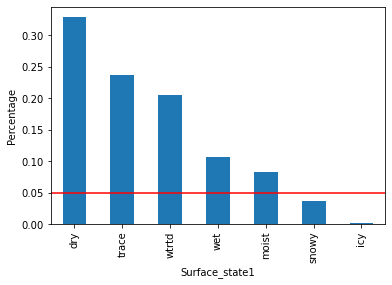

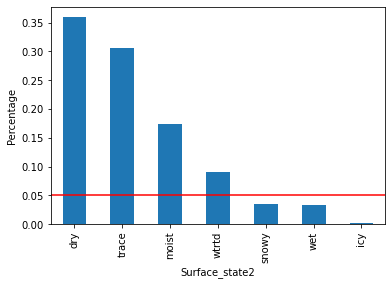

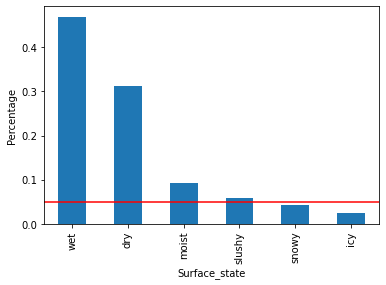

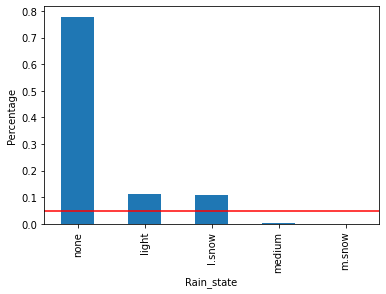

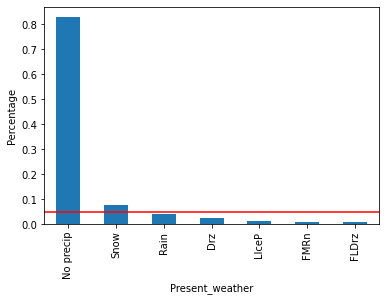

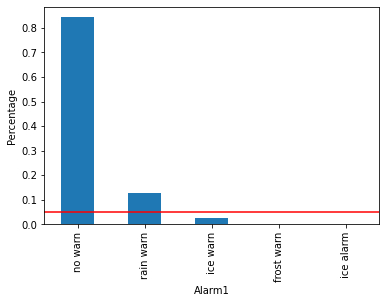

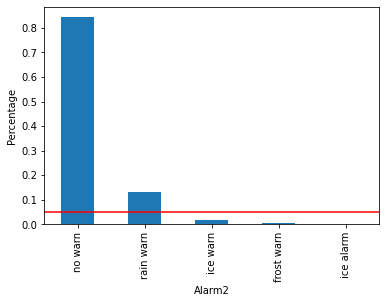

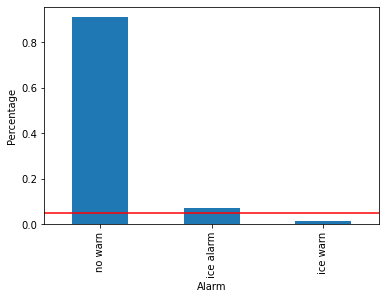

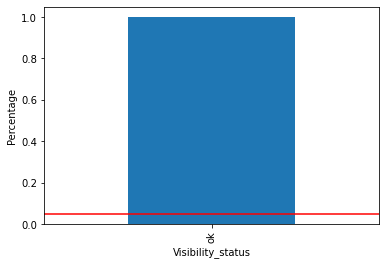

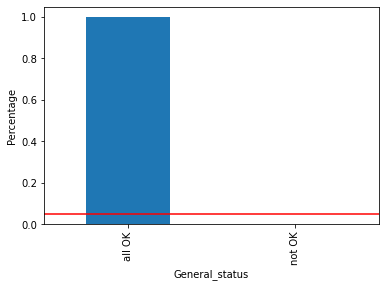

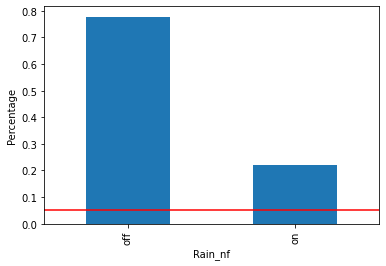

In [31]:
for col in ['Surface_state1', 
                'Surface_state2',
                'Surface_state',
                'Rain_state',
                'Present_weather',
                'Alarm1',
                'Alarm2',
                'Alarm',
                'Visibility_status',
                'General_status',
                'Rain_nf']:
    
    temp_df = pd.Series(X_train[col].value_counts() / len(X_train))
    
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage')
    plt.show()

In [32]:
def find_non_rare_labels(df, variable, tolerance):
    
    temp = df.groupby([variable])[variable].count() /len(df)
    
    non_rare = [x for x in temp.loc[temp>tolerance].index.values]
    
    return non_rare

In [33]:
find_non_rare_labels(X_train, 'Surface_state1', 0.05)

['dry', 'moist', 'trace', 'wet', 'wtrtd']

In [34]:
find_non_rare_labels(X_train, 'Surface_state2', 0.05)

['dry', 'moist', 'trace', 'wtrtd']

In [35]:
find_non_rare_labels(X_train, 'Surface_state', 0.05)

['dry', 'moist', 'slushy', 'wet']

In [36]:
find_non_rare_labels(X_train, 'Rain_state', 0.05)

['l.snow', 'light', 'none']

In [37]:
find_non_rare_labels(X_train, 'Present_weather', 0.05)

['No precip', 'Snow']

In [38]:
find_non_rare_labels(X_train, 'Alarm1', 0.05)

['no warn', 'rain warn']

In [39]:
find_non_rare_labels(X_train, 'Alarm2', 0.05)

['no warn', 'rain warn']

In [40]:
find_non_rare_labels(X_train, 'Alarm', 0.05)

['ice alarm', 'no warn']

In [41]:
find_non_rare_labels(X_train,  'Visibility_status', 0.05)

['ok']

In [42]:
find_non_rare_labels(X_train, 'General_status', 0.05)

['all OK']

In [43]:
find_non_rare_labels(X_train, 'Rain_nf', 0.05)

['off', 'on']

In [44]:
[x for x in X_train['Surface_state1'].unique()
if x not in find_non_rare_labels(X_train, 'Surface_state1', 0.05)]

['snowy', 'icy']

In [45]:
[x for x in X_train['Surface_state2'].unique()
if x not in find_non_rare_labels(X_train, 'Surface_state2', 0.05)]

['wet', 'snowy', 'icy']

In [46]:
[x for x in X_train['Surface_state'].unique()
if x not in find_non_rare_labels(X_train, 'Surface_state', 0.05)]

['icy', 'snowy']

In [47]:
[x for x in X_train['Rain_state'].unique()
if x not in find_non_rare_labels(X_train, 'Rain_state', 0.05)]

['medium', 'm.snow']

In [48]:
[x for x in X_train['Present_weather'].unique()
if x not in find_non_rare_labels(X_train, 'Present_weather', 0.05)]

['Rain', 'Drz', 'LIceP', 'FMRn', 'FLDrz']

In [49]:
[x for x in X_train['Alarm1'].unique()
if x not in find_non_rare_labels(X_train, 'Alarm1', 0.05)]

['ice warn', 'frost warn', 'ice alarm']

In [50]:
[x for x in X_train[ 'Alarm2'].unique()
if x not in find_non_rare_labels(X_train,  'Alarm2', 0.05)]

['frost warn', 'ice warn', 'ice alarm']

In [51]:
[x for x in X_train['Alarm'].unique()
if x not in find_non_rare_labels(X_train, 'Alarm', 0.05)]

['ice warn']

In [52]:
[x for x in X_train['Visibility_status'].unique()
if x not in find_non_rare_labels(X_train, 'Visibility_status', 0.05)]

[]

In [53]:
[x for x in X_train['General_status'].unique()
if x not in find_non_rare_labels(X_train, 'General_status', 0.05)]

['not OK']

In [54]:
[x for x in X_train['Rain_nf'].unique()
if x not in find_non_rare_labels(X_train, 'Rain_nf', 0.05)]

[]

In [55]:
def rare_encoding(X_train, X_test, variable, tolerance):
    
    X_train = X_train.copy()
    X_test = X_test.copy()
    
    frequent_cat = find_non_rare_labels(X_train, variable, tolerance)
    
    X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'rare')
    X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'rare')
    
    return X_train, X_test

In [56]:
for variable in ['Surface_state1', 
                'Surface_state2',
                'Surface_state',
                'Rain_state',
                'Present_weather',
                'Alarm1',
                'Alarm2',
                'Alarm',
                'Visibility_status',
                'General_status',
                'Rain_nf']:
    
    X_train, X_test = rare_encoding(X_train, X_test, variable, 0.05)

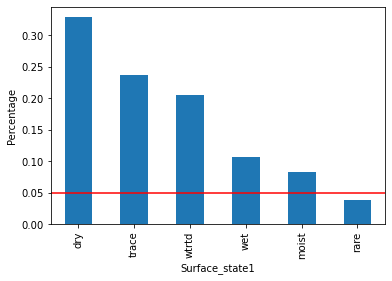

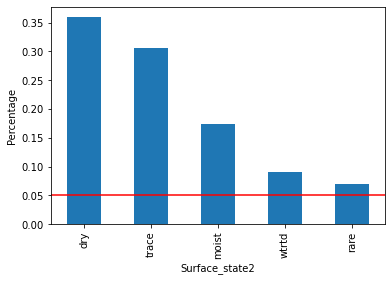

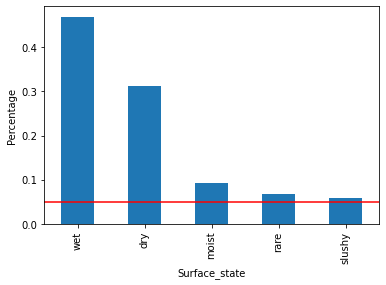

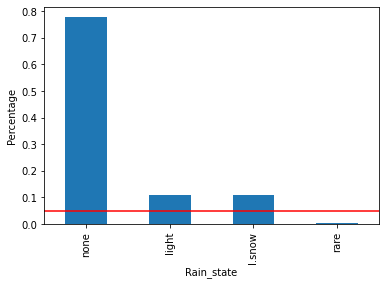

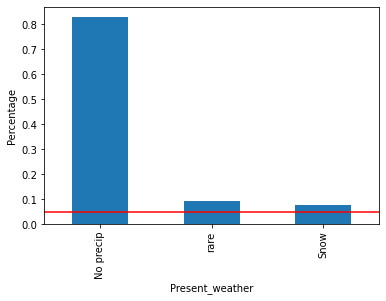

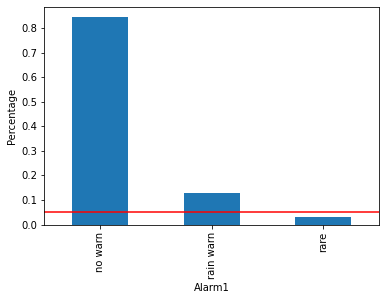

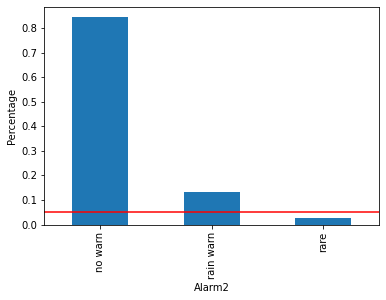

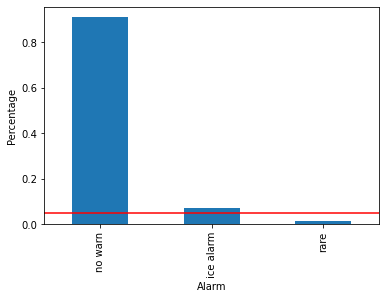

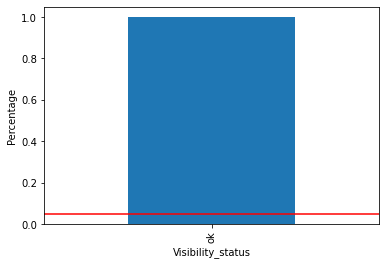

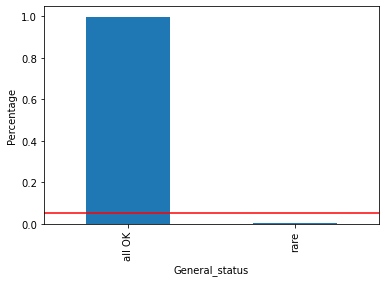

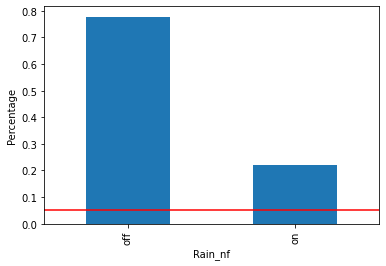

In [57]:
for col in ['Surface_state1', 
                'Surface_state2',
                'Surface_state',
                'Rain_state',
                'Present_weather',
                'Alarm1',
                'Alarm2',
                'Alarm',
                'Visibility_status',
                'General_status',
                'Rain_nf']:
    
    temp_df = pd.Series(X_train[col].value_counts() / len(X_train))
    
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage')
    plt.show()

In [58]:
def categories_to_ordered(df_train, df_test, y_train, y_test):
    
    df_train_temp = pd.concat([df_train, y_train], axis=1).copy()
    df_test_temp = pd.concat([df_test, y_test], axis=1).copy()
    
    for col in ['Surface_state1', 
                'Surface_state2',
                'Surface_state',
                'Rain_state',
                'Present_weather',
                'Alarm1',
                'Alarm2',
                'Alarm',
                'Visibility_status',
                'General_status',
                'Rain_nf']:
        ordered_labels = df_train_temp.groupby([col])['Surface_temp'].mean().sort_values().index
        ordinal_label = {k: i for i, k in enumerate(ordered_labels,0)}
        
        df_train_temp[col] = df_train[col].map(ordinal_label)
        df_test_temp[col] = df_test[col].map(ordinal_label)
        
    df_train_temp.drop(['Surface_temp'], axis=1, inplace= True)
    df_test_temp.drop(['Surface_temp'], axis=1, inplace= True)
    
    return df_train_temp, df_test_temp

In [59]:
X_train_ordered, X_test_ordered = categories_to_ordered(X_train, X_test, y_train, y_test)

In [60]:
X_train_ordered.shape, X_test_ordered.shape

((2678, 45), (1149, 45))

In [61]:
X_train_ordered.head()

,Surface_temp1,Surface_temp2,Surface_state1,Surface_state2,Surface_state,Air_temp,Dew_point,grip,Water_L,Ice_L,...,Base_temp,Lfreezing1,Lfreezing2,Ground_temp1,Ground_temp2,Freezing_temp1,Freezing_temp2,Max_windS,Water_t1,Water_t2
17.02.2019 16:30,3.4,3.2,4,3,4,2.8,-4.3,0.82,0.00,0.00,...,0.9,0.0,-0.4,3.4,3.3,0.0,-0.4,1.3,0.00,0.0
26.02.2019 12:00,12.2,13.9,4,3,4,9.3,-1.7,0.82,0.00,0.00,...,2.5,0.0,0.0,7.9,7.8,0.0,0.0,8.8,0.00,0.0
23.02.2019 21:00,2.6,2.4,3,4,3,2.9,1.4,0.82,0.02,0.00,...,1.2,-0.1,-0.3,2.7,2.5,-0.1,-0.3,6.6,0.00,0.0
16.02.2019 00:10,0.0,0.2,2,0,2,3.9,-0.1,0.81,0.07,0.00,...,1.3,-0.1,-0.5,1.1,1.1,-0.2,-0.5,8.1,0.04,0.0
04.02.2019 19:00,-3.4,-3.2,0,0,1,-2.8,-3.4,0.47,0.00,0.09,...,-4.2,-0.2,-1.4,-4.3,-4.2,-0.6,-1.4,4.6,0.10,0.0


In [62]:
X_train_ordered.duplicated().sum()

0

In [63]:
X_test_ordered.duplicated().sum()

0

In [64]:
X_train_ordered.describe()

,Surface_temp1,Surface_temp2,Surface_state1,Surface_state2,Surface_state,Air_temp,Dew_point,grip,Water_L,Ice_L,...,Base_temp,Lfreezing1,Lfreezing2,Ground_temp1,Ground_temp2,Freezing_temp1,Freezing_temp2,Max_windS,Water_t1,Water_t2
count,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,...,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.00000,2678.000000,2678.000000,2678.000000
mean,0.629425,0.705713,2.550037,2.025765,2.535848,0.860978,-2.401456,0.751878,0.082095,0.018839,...,0.003435,-0.223002,-0.771509,0.634018,0.610493,-0.472928,-0.95239,5.771098,0.056662,0.045541
std,4.707686,4.795189,1.745777,1.532517,1.164802,5.051227,4.943694,0.147199,0.123778,0.061783,...,2.059379,0.491885,1.293222,3.802401,3.738693,1.547278,1.85628,2.645061,0.129535,0.234573
min,-14.600000,-14.500000,0.000000,0.000000,0.000000,-20.000000,-21.900000,0.110000,0.000000,0.000000,...,-4.600000,-8.300000,-21.100000,-11.300000,-11.300000,-21.100000,-21.10000,0.500000,0.000000,0.000000
25%,-1.400000,-1.500000,1.000000,0.000000,2.000000,-0.700000,-4.200000,0.780000,0.000000,0.000000,...,-1.500000,-0.300000,-1.000000,-1.000000,-1.100000,-0.500000,-1.20000,3.700000,0.000000,0.000000
50%,1.100000,1.000000,3.000000,3.000000,2.000000,2.000000,-0.800000,0.810000,0.050000,0.000000,...,0.000000,-0.100000,-0.400000,0.900000,0.800000,-0.100000,-0.50000,5.700000,0.030000,0.000000
75%,3.300000,3.300000,4.000000,3.000000,4.000000,3.900000,1.300000,0.820000,0.110000,0.000000,...,1.400000,0.000000,-0.100000,3.000000,2.900000,0.000000,-0.10000,7.600000,0.060000,0.010000
max,14.200000,15.200000,5.000000,4.000000,4.000000,10.400000,3.700000,0.820000,1.810000,0.510000,...,4.600000,0.000000,0.000000,10.300000,10.200000,0.000000,0.00000,15.400000,1.880000,3.100000


In [65]:
scaler = RobustScaler()

In [66]:
scaler.fit(X_train_ordered)

RobustScaler()

In [67]:
X_train_ordered_scaled = scaler.transform(X_train_ordered)
X_test_ordered_scaled = scaler.transform(X_test_ordered)

In [68]:
X_train_ordered_scaled = pd.DataFrame(X_train_ordered_scaled, columns=X_train_ordered.columns)
X_test_ordered_scaled = pd.DataFrame(X_test_ordered_scaled, columns=X_test_ordered.columns)

In [69]:
X_train_ordered_scaled.describe()

,Surface_temp1,Surface_temp2,Surface_state1,Surface_state2,Surface_state,Air_temp,Dew_point,grip,Water_L,Ice_L,...,Base_temp,Lfreezing1,Lfreezing2,Ground_temp1,Ground_temp2,Freezing_temp1,Freezing_temp2,Max_windS,Water_t1,Water_t2
count,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,...,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000,2678.000000
mean,-0.100122,-0.061310,-0.149988,-0.324745,0.267924,-0.247613,-0.291174,-1.453043,0.291771,0.018839,...,0.001185,-0.410007,-0.412787,-0.066496,-0.047377,-0.745855,-0.411263,0.018230,0.444361,4.554145
std,1.001635,0.998998,0.581926,0.510839,0.582401,1.098093,0.898853,3.679976,1.125258,0.061783,...,0.710131,1.639617,1.436913,0.950600,0.934673,3.094557,1.687527,0.678221,2.158924,23.457332
min,-3.340426,-3.229167,-1.000000,-1.000000,-1.000000,-4.782609,-3.836364,-17.500000,-0.454545,0.000000,...,-1.586207,-27.333333,-23.000000,-3.050000,-3.025000,-42.000000,-18.727273,-1.333333,-0.500000,0.000000
25%,-0.531915,-0.520833,-0.666667,-1.000000,0.000000,-0.586957,-0.618182,-0.750000,-0.454545,0.000000,...,-0.517241,-0.666667,-0.666667,-0.475000,-0.475000,-0.800000,-0.636364,-0.512821,-0.500000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.468085,0.479167,0.333333,0.000000,1.000000,0.413043,0.381818,0.250000,0.545455,0.000000,...,0.482759,0.333333,0.333333,0.525000,0.525000,0.200000,0.363636,0.487179,0.500000,1.000000
max,2.787234,2.958333,0.666667,0.333333,1.000000,1.826087,0.818182,0.250000,16.000000,0.510000,...,1.586207,0.333333,0.444444,2.350000,2.350000,0.200000,0.454545,2.487179,30.833333,310.000000


In [70]:
sel = VarianceThreshold(threshold=0)

In [71]:
sel.fit(X_train_ordered_scaled)

VarianceThreshold(threshold=0)

In [72]:
sum(sel.get_support())

43

In [73]:
print(
    len([
        x for x in X_train_ordered_scaled.columns
        if x not in  X_train_ordered_scaled.columns[sel.get_support()]]))

[x for x in X_train_ordered_scaled.columns if x not in  X_train_ordered_scaled.columns[sel.get_support()]]

2


['Visibility_status', 'Relay_state']

In [74]:
features_to_keep = X_train_ordered_scaled.columns[sel.get_support()]

In [75]:
X_train_ordered_scaled= sel.transform(X_train_ordered_scaled)
X_test_ordered_scaled= sel.transform(X_test_ordered_scaled)
 
X_train_ordered_scaled.shape, X_test_ordered_scaled.shape

((2678, 43), (1149, 43))

In [76]:
X_train_ordered_scaled= pd.DataFrame(X_train_ordered_scaled)
X_train_ordered_scaled.columns = features_to_keep
 
X_test_ordered_scaled= pd.DataFrame(X_test_ordered_scaled)
X_test_ordered_scaled.columns = features_to_keep

In [77]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train_ordered_scaled)

VarianceThreshold(threshold=0.01)

In [78]:
sum(sel.get_support())

41

In [79]:
print(
    len([
        x for x in X_train_ordered_scaled.columns
        if x not in  X_train_ordered_scaled.columns[sel.get_support()]]))

[x for x in X_train_ordered_scaled.columns if x not in  X_train_ordered_scaled.columns[sel.get_support()]]

2


['Ice_L', 'General_status']

In [80]:
features_to_keep = X_train_ordered_scaled.columns[sel.get_support()]

In [81]:
X_train_ordered_scaled= sel.transform(X_train_ordered_scaled)
X_test_ordered_scaled= sel.transform(X_test_ordered_scaled)

X_train_ordered_scaled.shape, X_test_ordered_scaled.shape

((2678, 41), (1149, 41))

In [82]:
X_train_ordered_scaled= pd.DataFrame(X_train_ordered_scaled)
X_train_ordered_scaled.columns = features_to_keep
 
X_test_ordered_scaled= pd.DataFrame(X_test_ordered_scaled)
X_test_ordered_scaled.columns = features_to_keep

In [83]:
X_train_ordered_scaled.columns

Index(['Surface_temp1', 'Surface_temp2', 'Surface_state1', 'Surface_state2',
       'Surface_state', 'Air_temp', 'Dew_point', 'grip', 'Water_L', 'Snow_L',
       'Humidity', 'Rain_state', 'Rain_int', 'Wind_S', 'Wind_D', 'Visibility',
       'Present_weather', 'Precipitation_24', 'Alarm1', 'Alarm2', 'Alarm',
       'Battery_voltage', 'Concentration1', 'Concentration2', 'Conductivity1',
       'Conductivity2', 'Chemical1', 'Chemical2', 'Pressure', 'Rain_nf',
       'Snow_h', 'Base_temp', 'Lfreezing1', 'Lfreezing2', 'Ground_temp1',
       'Ground_temp2', 'Freezing_temp1', 'Freezing_temp2', 'Max_windS',
       'Water_t1', 'Water_t2'],
      dtype='object')

In [84]:
corrmat = X_train_ordered_scaled.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.6]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,Ground_temp2,Ground_temp1,0.999165
1,Ground_temp1,Ground_temp2,0.999165
2,Surface_temp1,Surface_temp2,0.997285
3,Surface_temp2,Surface_temp1,0.997285
4,Chemical1,Freezing_temp1,0.975514


In [85]:
grouped_feature_Is = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_Is:
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_Is = grouped_feature_Is + list(correlated_block.feature2.unique()) + [feature]
        
        correlated_groups.append(correlated_block)
        
print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train_ordered.shape[1]))

found 11 correlated groups
out of 45 total features


In [86]:
for group in correlated_groups:
    print(group)
    print()

         feature1         feature2      corr
0    Ground_temp2     Ground_temp1  0.999165
10   Ground_temp2    Surface_temp1  0.956161
14   Ground_temp2    Surface_temp2  0.945941
23   Ground_temp2         Air_temp  0.931485
43   Ground_temp2  Battery_voltage  0.875674
71   Ground_temp2        Base_temp  0.743984
81   Ground_temp2        Dew_point  0.718880
118  Ground_temp2   Surface_state1  0.601745

     feature1        feature2      corr
4   Chemical1  Freezing_temp1  0.975514
26  Chemical1       Chemical2  0.925508
45  Chemical1  Freezing_temp2  0.859313
58  Chemical1      Lfreezing1  0.782549
87  Chemical1      Lfreezing2  0.701279

  feature1   feature2      corr
6   Wind_S  Max_windS  0.969951

    feature1 feature2      corr
40    Alarm2   Alarm1  0.875726
104   Alarm2     grip  0.619099

    feature1 feature2      corr
53     Alarm     grip  0.822193
110    Alarm   Snow_L  0.614609

         feature1        feature2      corr
56  Conductivity1   Conductivity2  0.789691
76  Co

In [87]:
X_train_ordered_scaled = X_train_ordered_scaled.drop(['Ground_temp1',
                                                      'Chemical1',
                                                      'Max_windS',
                                                      'Alarm2',
                                                      'Alarm',
                                                      'Conductivity2',
                                                      'Snow_h',
                                                      'Water_t1',
                                                      'Surface_state',
                                                      'Surface_state2',
                                                      'Present_weather'
                                                     ], axis=1)

In [88]:
X_test_ordered_scaled = X_test_ordered_scaled.drop(['Ground_temp1',
                                                      'Chemical1',
                                                      'Max_windS',
                                                      'Alarm2',
                                                      'Alarm',
                                                      'Conductivity2',
                                                      'Snow_h',
                                                      'Water_t1',
                                                      'Surface_state',
                                                      'Surface_state2',
                                                      'Present_weather'], axis=1)

In [89]:
corrmat = X_train_ordered_scaled.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.6]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,Surface_temp2,Surface_temp1,0.997285
1,Surface_temp1,Surface_temp2,0.997285
2,Surface_temp1,Ground_temp2,0.956161
3,Ground_temp2,Surface_temp1,0.956161
4,Ground_temp2,Surface_temp2,0.945941


In [90]:
grouped_feature_Is = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_Is:
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_Is = grouped_feature_Is + list(correlated_block.feature2.unique()) + [feature]
        
        correlated_groups.append(correlated_block)
        
print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train_ordered.shape[1]))

found 6 correlated groups
out of 45 total features


In [91]:
for group in correlated_groups:
    print(group)
    print()

         feature1         feature2      corr
0   Surface_temp2    Surface_temp1  0.997285
5   Surface_temp2     Ground_temp2  0.945941
13  Surface_temp2         Air_temp  0.929172
17  Surface_temp2  Battery_voltage  0.900910
45  Surface_temp2        Dew_point  0.726202
59  Surface_temp2   Surface_state1  0.608985

     feature1        feature2      corr
18  Chemical2  Freezing_temp1  0.897378
22  Chemical2  Freezing_temp2  0.882800
55  Chemical2      Lfreezing1  0.627158

      feature1        feature2      corr
31  Lfreezing2  Freezing_temp2  0.830215
32  Lfreezing2      Lfreezing1  0.804045
39  Lfreezing2  Freezing_temp1  0.750099

     feature1      feature2      corr
43  Base_temp  Ground_temp2  0.743984
63  Base_temp      Air_temp  0.601839

   feature1 feature2      corr
48     grip   Snow_L  0.693945
50     grip   Alarm1  0.638467

         feature1        feature2      corr
53  Conductivity1  Surface_state1  0.636272



In [92]:
X_train_ordered_scaled = X_train_ordered_scaled.drop(['Surface_temp1',
                                                     'Chemical2',
                                                      'Lfreezing2',
                                                      'Base_temp',
                                                      'grip',
                                                      'Conductivity1'
                                                     ], axis=1)

In [93]:
X_test_ordered_scaled = X_test_ordered_scaled.drop(['Surface_temp1',
                                                     'Chemical2',
                                                      'Lfreezing2',
                                                      'Base_temp',
                                                      'grip',
                                                      'Conductivity1'], axis=1)

In [94]:
corrmat = X_train_ordered_scaled.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.6]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,Ground_temp2,Surface_temp2,0.945941
1,Surface_temp2,Ground_temp2,0.945941
2,Battery_voltage,Air_temp,0.938231
3,Air_temp,Battery_voltage,0.938231
4,Air_temp,Ground_temp2,0.931485


In [95]:
grouped_feature_Is = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_Is:
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_Is = grouped_feature_Is + list(correlated_block.feature2.unique()) + [feature]
        
        correlated_groups.append(correlated_block)
        
print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train_ordered.shape[1]))

found 3 correlated groups
out of 45 total features


In [96]:
for group in correlated_groups:
    print(group)
    print()

        feature1         feature2      corr
0   Ground_temp2    Surface_temp2  0.945941
5   Ground_temp2         Air_temp  0.931485
13  Ground_temp2  Battery_voltage  0.875674
24  Ground_temp2        Dew_point  0.718880
30  Ground_temp2   Surface_state1  0.601745

          feature1        feature2      corr
10  Freezing_temp2  Freezing_temp1  0.891830
20  Freezing_temp2      Lfreezing1  0.754011

   feature1 feature2      corr
26   Alarm1   Snow_L  0.616313



In [97]:
X_train_ordered_scaled = X_train_ordered_scaled.drop(['Surface_temp2',
                                                     'Freezing_temp1',
                                                     'Snow_L'], axis=1)

In [98]:
X_test_ordered_scaled = X_test_ordered_scaled.drop(['Surface_temp2',
                                                     'Freezing_temp1',
                                                     'Snow_L'], axis=1)

In [99]:
corrmat = X_train_ordered_scaled.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.6]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,Battery_voltage,Air_temp,0.938231
1,Air_temp,Battery_voltage,0.938231
2,Ground_temp2,Air_temp,0.931485
3,Air_temp,Ground_temp2,0.931485
4,Ground_temp2,Battery_voltage,0.875674


In [100]:
grouped_feature_Is = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_Is:
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_Is = grouped_feature_Is + list(correlated_block.feature2.unique()) + [feature]
        
        correlated_groups.append(correlated_block)
        
print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train_ordered.shape[1]))

found 3 correlated groups
out of 45 total features


In [101]:
for group in correlated_groups:
    print(group)
    print()

          feature1      feature2      corr
0  Battery_voltage      Air_temp  0.938231
5  Battery_voltage  Ground_temp2  0.875674
9  Battery_voltage     Dew_point  0.767404

          feature1    feature2      corr
10  Freezing_temp2  Lfreezing1  0.754011

          feature1      feature2      corr
15  Surface_state1  Ground_temp2  0.601745



In [102]:
X_train_ordered_scaled = X_train_ordered_scaled.drop([
                                                      'Battery_voltage',
                                                      'Freezing_temp2',
                                                      'Ground_temp2'
                                                     ], axis=1)

In [103]:
X_test_ordered_scaled = X_test_ordered_scaled.drop(['Battery_voltage',
                                                      'Freezing_temp2',
                                                      'Ground_temp2'
                                                    ], axis=1)

In [104]:
corrmat = X_train_ordered_scaled.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.6]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,Dew_point,Air_temp,0.847185
1,Air_temp,Dew_point,0.847185


In [105]:
grouped_feature_Is = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_Is:
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_Is = grouped_feature_Is + list(correlated_block.feature2.unique()) + [feature]
        
        correlated_groups.append(correlated_block)
        
print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train_ordered.shape[1]))

found 1 correlated groups
out of 45 total features


In [106]:
for group in correlated_groups:
    print(group)
    print()

    feature1  feature2      corr
0  Dew_point  Air_temp  0.847185



In [107]:
X_train_ordered_scaled = X_train_ordered_scaled.drop(['Dew_point'], axis=1)

In [108]:
X_test_ordered_scaled = X_test_ordered_scaled.drop(['Dew_point'], axis=1)

In [109]:
corrmat = X_train_ordered_scaled.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.6]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr


In [110]:
grouped_feature_Is = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_Is:
        correlated_block = corrmat[corrmat.feature1 == feature]
        grouped_feature_Is = grouped_feature_Is + list(correlated_block.feature2.unique()) + [feature]
        
        correlated_groups.append(correlated_block)
        
print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train_ordered.shape[1]))

found 0 correlated groups
out of 45 total features


In [111]:
for group in correlated_groups:
    print(group)
    print()

In [112]:
corrmat = X_train_ordered_scaled.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.6]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr


<AxesSubplot:>

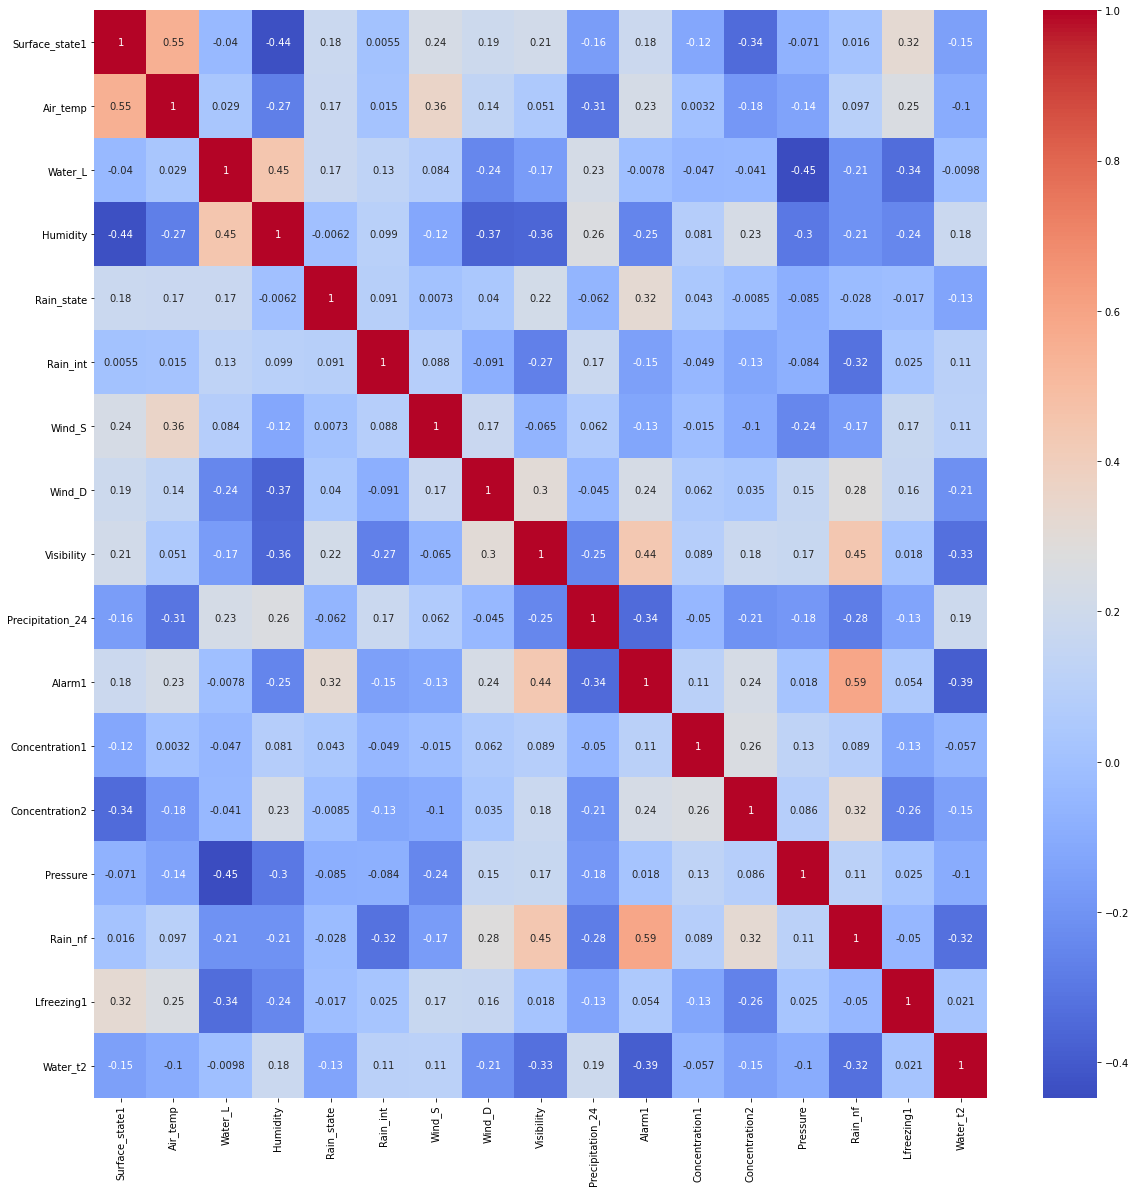

In [113]:
corrmat = X_train_ordered_scaled.corr()
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(corrmat,cmap ="coolwarm", annot=True)

In [114]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [115]:
corr_features = correlation(X_train_ordered_scaled, 0.6)
len(set(corr_features))

0

In [116]:
X_train_ordered_scaled.shape, X_test_ordered_scaled.shape

((2678, 17), (1149, 17))

In [117]:
X_train_ordered_scaled.columns

Index(['Surface_state1', 'Air_temp', 'Water_L', 'Humidity', 'Rain_state',
       'Rain_int', 'Wind_S', 'Wind_D', 'Visibility', 'Precipitation_24',
       'Alarm1', 'Concentration1', 'Concentration2', 'Pressure', 'Rain_nf',
       'Lfreezing1', 'Water_t2'],
      dtype='object')

In [118]:
from sklearn.tree import DecisionTreeRegressor

In [119]:
mse_values = []
for feature in X_train_ordered_scaled.columns:
    clf =DecisionTreeRegressor()
    clf.fit(X_train_ordered_scaled[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict(X_test_ordered_scaled[feature].fillna(0).to_frame())
    mse_values.append(mean_squared_error(y_test, y_scored))

In [120]:
mse_values = pd.Series(mse_values)
mse_values.index = X_train_ordered_scaled.columns
mse_values.sort_values(ascending=False)

Visibility          18.364383
Rain_nf             16.684675
Concentration1      16.656377
Rain_int            16.646359
Rain_state          16.459496
Water_t2            16.093107
Water_L             15.899005
Alarm1              15.745945
Pressure            15.555931
Wind_D              15.180778
Wind_S              14.280679
Humidity            13.878153
Lfreezing1          13.484521
Precipitation_24    12.743110
Surface_state1      10.795046
Concentration2       8.577026
Air_temp             0.980659
dtype: float64

<AxesSubplot:>

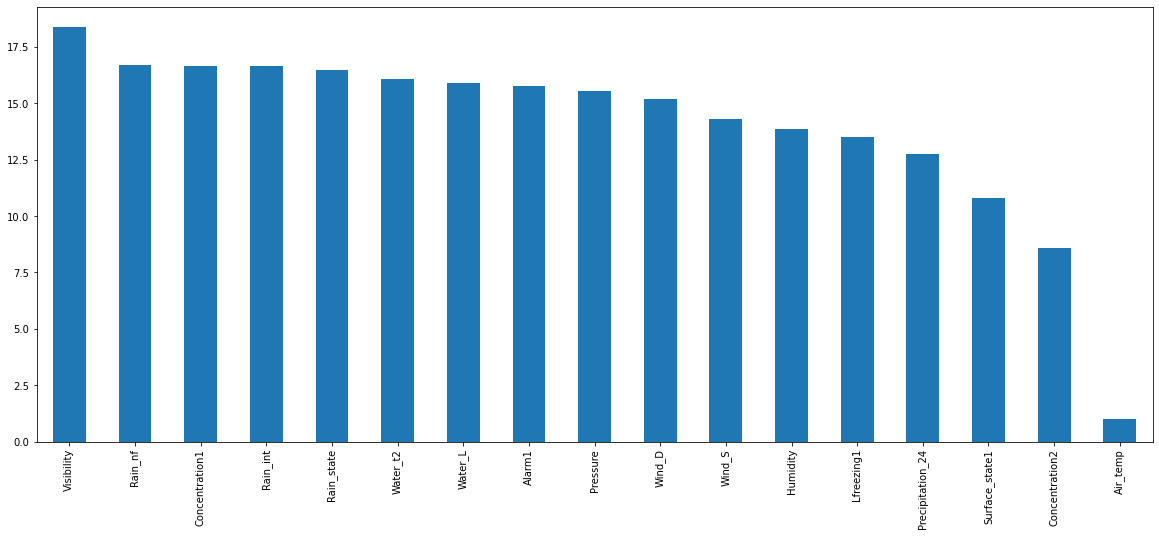

In [121]:
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [122]:
len(mse_values[mse_values < 16 ])

11

In [123]:
X_train_ordered_scaled = X_train_ordered_scaled.drop(['Visibility',
'Rain_nf' ,            
'Concentration1'  ,    
'Rain_int'   ,       
'Rain_state'   ,  
'Water_t2'
                                                 
], axis=1)

In [124]:
X_test_ordered_scaled = X_test_ordered_scaled.drop(['Visibility',
'Rain_nf' ,            
'Concentration1'  ,    
'Rain_int'   ,       
'Rain_state'   ,  
'Water_t2'                      
], axis=1)

In [125]:
X_train_ordered_scaled.shape

(2678, 11)

In [126]:
X_train_ordered_scaled.columns

Index(['Surface_state1', 'Air_temp', 'Water_L', 'Humidity', 'Wind_S', 'Wind_D',
       'Precipitation_24', 'Alarm1', 'Concentration2', 'Pressure',
       'Lfreezing1'],
      dtype='object')

In [127]:
train_sizes = [1, 100, 500, 1000, 1500,  2142]

In [128]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = X_train_ordered_scaled,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [129]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.         -0.         -0.         -0.         -0.        ]
 [-0.80374148 -0.79812208 -0.79812208 -0.79812208 -0.79812208]
 [-0.89856071 -0.93113064 -0.93113064 -0.93113064 -0.93113064]
 [-0.95535136 -0.98119544 -0.92270841 -0.92270841 -0.92270841]
 [-0.95572887 -0.96682394 -0.94176187 -0.96791821 -0.96791821]
 [-1.00763216 -1.01758627 -0.99944817 -1.00328031 -0.96891064]]

 ----------------------------------------------------------------------

Validation scores:

 [[-21.85477612 -20.13531716 -27.68529851 -26.34373832 -24.41607477]
 [ -1.09375404  -1.00680451  -1.11901681  -1.10508363  -1.20677112]
 [ -1.00002472  -0.96565938  -1.02062827  -0.99943814  -1.17268486]
 [ -0.98850467  -0.94200372  -1.0089791   -0.9986698   -1.14386892]
 [ -0.97084305  -0.9470553   -1.00633049  -0.9970857   -1.1398612 ]
 [ -0.97740207  -0.94103525  -1.00616593  -0.99453324  -1.13416537]]


In [130]:
train_scores_mean_lm = -train_scores.mean(axis = 1)
validation_scores_mean_lm = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_lm, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean_lm, index = train_sizes))

Mean training scores

 1      -0.000000
100     0.799246
500     0.924617
1000    0.940934
1500    0.960030
2142    0.999372
dtype: float64

 --------------------

Mean validation scores

 1       24.087041
100      1.106286
500      1.031687
1000     1.016405
1500     1.012235
2142     1.010660
dtype: float64


(0.0, 5.0)

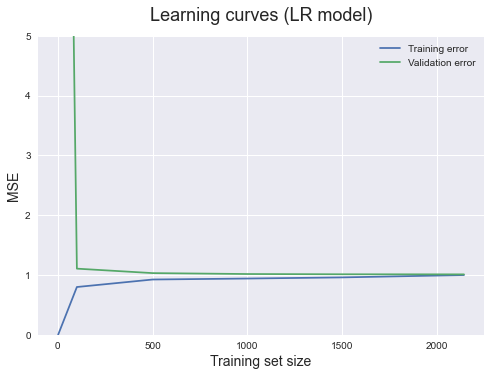

In [131]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean_lm, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean_lm, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves (LR model)', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,5)

In [132]:
lm = LinearRegression(fit_intercept=True, normalize=True)

In [133]:
lm.fit(X_train_ordered_scaled,y_train)

LinearRegression(normalize=True)

In [134]:
print(lm.intercept_)

1.3010310878068343


In [135]:
lm.coef_

array([ 0.61367121,  3.637146  , -0.14525358, -0.08782434,  0.09739236,
       -0.17138521,  0.11029871,  0.38190523, -0.10910275,  0.24228596,
        0.02575481])

In [136]:
cdf = pd.DataFrame(lm.coef_, X_train_ordered_scaled.columns, columns=['coeff'])

In [137]:
cdf

,coeff
Surface_state1,0.613671
Air_temp,3.637146
Water_L,-0.145254
Humidity,-0.087824
Wind_S,0.097392
Wind_D,-0.171385
Precipitation_24,0.110299
Alarm1,0.381905
Concentration2,-0.109103
Pressure,0.242286


In [138]:
lm_pred_train = lm.predict(X_train_ordered_scaled)
lm_pred_test = lm.predict(X_test_ordered_scaled)

In [139]:
print(lm_pred_test)

[-1.05210654  1.6617658  -2.46806845 ... -2.53142837  2.06797602
  5.62714711]


In [140]:
print('test mse: {}'.format(metrics.mean_squared_error(y_test,lm_pred_test)))
print('test rmse: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,lm_pred_test))))
print('test r2: {}'.format(r2_score(y_test,lm_pred_test)))

test mse: 0.9547529891889044
test rmse: 0.9771146243859542
test r2: 0.9430788938214313


Text(0.5, 1.03, 'Scatter plot (LR model)')

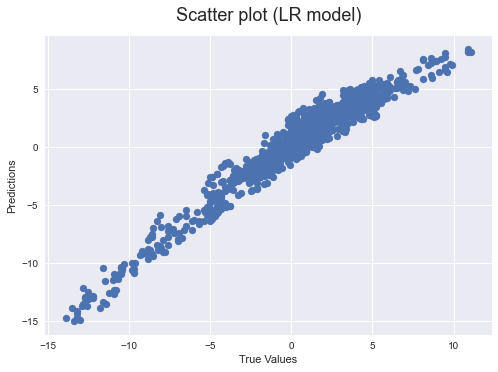

In [141]:
plt.scatter(y_test,lm_pred_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter plot (LR model)',fontsize = 18, y = 1.03)

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

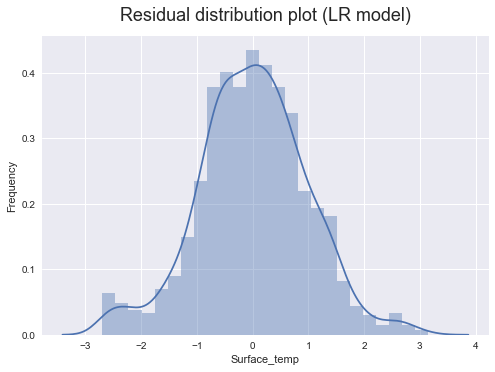

In [142]:
ax = sns.distplot((y_test-lm_pred_test))
ax.set_title('Residual distribution plot (LR model)',fontsize = 18, y = 1.03)
ax.set_ylabel('Frequency')

In [143]:
rfc = RandomForestRegressor(min_weight_fraction_leaf=0.05)

In [144]:
rfc.fit(X_train_ordered_scaled,y_train)

RandomForestRegressor(min_weight_fraction_leaf=0.05)

In [145]:
rfc_pred_train = rfc.predict(X_train_ordered_scaled)
rfc_pred_test = rfc.predict(X_test_ordered_scaled)

In [146]:
rfc_pred_test

array([-1.35058309,  1.50586003, -2.85223404, ..., -2.93544196,
        1.27458819,  8.14309123])

In [147]:
print('test mse: {}'.format(metrics.mean_squared_error(y_test,rfc_pred_test)))
print('test rmse: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,rfc_pred_test))))
print('test r2: {}'.format(r2_score(y_test,rfc_pred_test)))

test mse: 1.0381092967789218
test rmse: 1.0188764874993053
test r2: 0.9381093013836892


In [148]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestRegressor(min_weight_fraction_leaf=0.05),
X = X_train_ordered_scaled,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [149]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.00000000e+00 -2.83989926e-29 -2.83989926e-29 -2.83989926e-29
  -2.83989926e-29]
 [-8.51570785e-01 -5.26185317e-01 -5.63149798e-01 -5.37609565e-01
  -5.62385825e-01]
 [-8.49571091e-01 -7.90214636e-01 -7.95477412e-01 -7.87147224e-01
  -7.85114296e-01]
 [-9.39963839e-01 -8.59213274e-01 -9.27028413e-01 -9.05443633e-01
  -8.79928588e-01]
 [-9.13880847e-01 -8.55097112e-01 -9.17662734e-01 -9.66054685e-01
  -9.51262091e-01]
 [-9.83675877e-01 -9.81451225e-01 -9.69765514e-01 -9.78916799e-01
  -9.94655693e-01]]

 ----------------------------------------------------------------------

Validation scores:

 [[-21.85477612 -20.13531716 -27.68529851 -26.34373832 -24.41607477]
 [ -2.1106699   -0.98532157  -1.42152534  -1.2221072   -1.28877891]
 [ -1.3278701   -0.8274471   -1.02964868  -1.00833384  -1.05049853]
 [ -1.14575146  -0.79245797  -1.14027064  -1.0979051   -1.12589053]
 [ -1.04254941  -0.75608451  -1.09788836  -1.11953444  -1.1306113 ]
 [ -1.09623856  -0.82533738  -1.101

In [150]:
train_scores_mean_rf = -train_scores.mean(axis = 1)
validation_scores_mean_rf = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_rf, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean_rf, index = train_sizes))

Mean training scores

 1       2.271919e-29
100     6.081803e-01
500     8.015049e-01
1000    9.023155e-01
1500    9.207915e-01
2142    9.816930e-01
dtype: float64

 --------------------

Mean validation scores

 1       24.087041
100      1.405681
500      1.048760
1000     1.060455
1500     1.029334
2142     1.046573
dtype: float64


(0.0, 5.0)

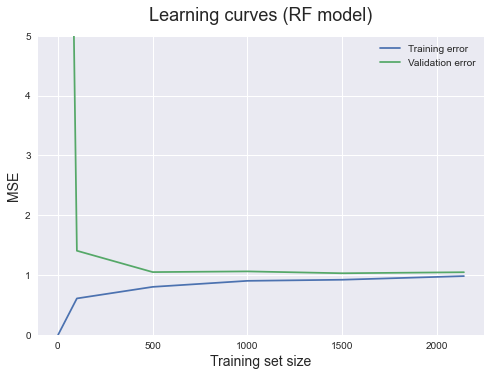

In [151]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean_rf, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean_rf, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves (RF model)', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,5)

Text(0.5, 1.03, 'Scatter plot (RF model)')

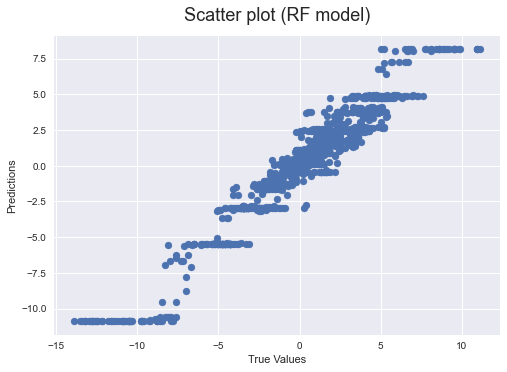

In [152]:
fig = plt.scatter(y_test,rfc_pred_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter plot (RF model)',fontsize = 18, y = 1.03)

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

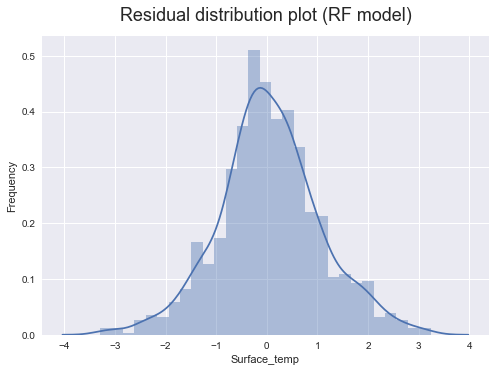

In [153]:
ax = sns.distplot((y_test-rfc_pred_test))
ax.set_title('Residual distribution plot (RF model)',fontsize = 18, y = 1.03)
ax.set_ylabel('Frequency')

In [154]:
svr_rbf = SVR(kernel='rbf', gamma='auto', C=1.5)

In [155]:
svr_rbf.fit(X_train_ordered_scaled,y_train)

SVR(C=1.5, gamma='auto')

In [156]:
svr_pred_train = svr_rbf.predict(X_train_ordered_scaled)
svr_pred_test = svr_rbf.predict(X_test_ordered_scaled)

In [157]:
svr_pred_test

array([-1.24177855,  0.82664035, -1.73141612, ..., -3.78428786,
        1.4669392 ,  6.6158597 ])

In [158]:
print('test mse: {}'.format(metrics.mean_squared_error(y_test,svr_pred_test)))
print('test rmse: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,svr_pred_test))))
print('test r2: {}'.format(r2_score(y_test,svr_pred_test)))

test mse: 0.3949784801016406
test rmse: 0.6284731339537439
test r2: 0.9764519071857372


Text(0.5, 1.03, 'Scatter plot (SVR model)')

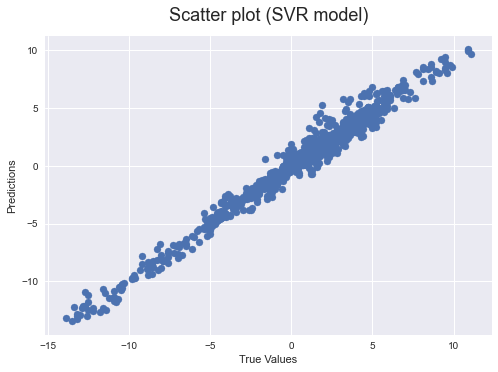

In [159]:
fig = plt.scatter(y_test,svr_pred_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter plot (SVR model)',fontsize = 18, y = 1.03)

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

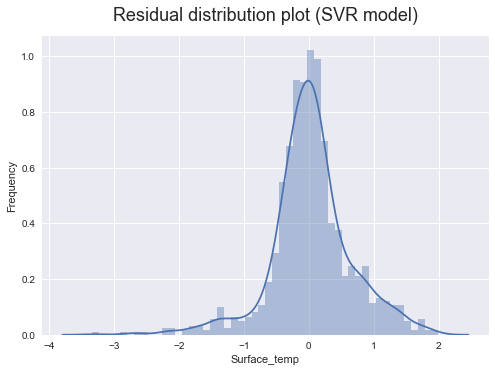

In [160]:
ax = sns.distplot(y_test-svr_pred_test)
ax.set_title('Residual distribution plot (SVR model)',fontsize = 18, y = 1.03)
ax.set_ylabel('Frequency')

In [161]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = SVR(kernel='rbf', gamma='auto', C=1.5),
X = X_train_ordered_scaled,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [162]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.         -0.         -0.         -0.         -0.        ]
 [-2.70686849 -2.66147349 -2.66147349 -2.66147349 -2.66147349]
 [-0.78868611 -0.61585848 -0.61585848 -0.61585848 -0.61585848]
 [-0.51045916 -0.46706216 -0.42979281 -0.42979281 -0.42979281]
 [-0.41842808 -0.40379444 -0.38384551 -0.39703854 -0.39703854]
 [-0.38898167 -0.37875942 -0.3671634  -0.37838135 -0.3528557 ]]

 ----------------------------------------------------------------------

Validation scores:

 [[-21.85477612 -20.13531716 -27.68529851 -26.34373832 -24.41607477]
 [ -5.98829299  -2.74713774  -3.74548521  -3.46123605  -3.18817243]
 [ -1.23187921  -0.83171242  -0.92125596  -0.70457239  -0.88120514]
 [ -0.56587525  -0.53485552  -0.57378669  -0.45743021  -0.57684524]
 [ -0.41321959  -0.46103285  -0.51681338  -0.40102151  -0.50111768]
 [ -0.36248356  -0.40874746  -0.44894931  -0.35879519  -0.45256422]]


In [163]:
train_scores_mean_svr = -train_scores.mean(axis = 1)
validation_scores_mean_svr = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_svr, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean_svr, index = train_sizes))

Mean training scores

 1      -0.000000
100     2.670552
500     0.650424
1000    0.453380
1500    0.400029
2142    0.373228
dtype: float64

 --------------------

Mean validation scores

 1       24.087041
100      3.826065
500      0.914125
1000     0.541759
1500     0.458641
2142     0.406308
dtype: float64


(0.0, 5.0)

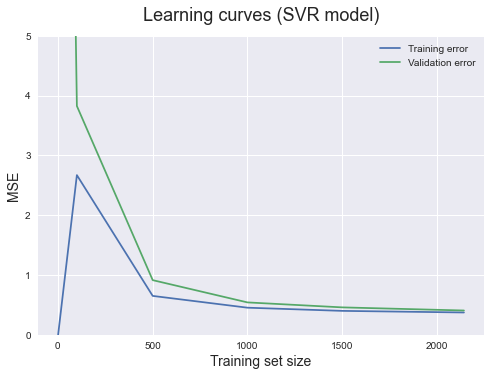

In [164]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean_svr, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean_svr, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves (SVR model)', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,5)

In [165]:
from sklearn.neural_network import MLPRegressor

In [166]:
NN = MLPRegressor(activation='relu', solver='adam',max_iter=110,hidden_layer_sizes=(40,))

In [167]:
NN.fit(X_train_ordered_scaled,y_train)

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(hidden_layer_sizes=(40,), max_iter=110)

In [168]:
NN_pred_train = NN.predict(X_train_ordered_scaled)
NN_pred_test = NN.predict(X_test_ordered_scaled)

In [169]:
NN_pred_test[0:10]

array([-1.04313492,  1.2362937 , -1.78729904, -0.70512261, -0.67719164,
        1.98777655, -4.16811965,  2.68591798, -4.79702897, -0.26742517])

In [170]:
print('test mse: {}'.format(metrics.mean_squared_error(y_test,NN_pred_test)))
print('test rmse: {}'.format(np.sqrt(metrics.mean_squared_error(y_test,NN_pred_test))))
print('test r2: {}'.format(r2_score(y_test,NN_pred_test)))

test mse: 0.4665554593209337
test rmse: 0.6830486507716224
test r2: 0.9721845826733062


Text(0.5, 1.03, 'Scatter plot (MLP model)')

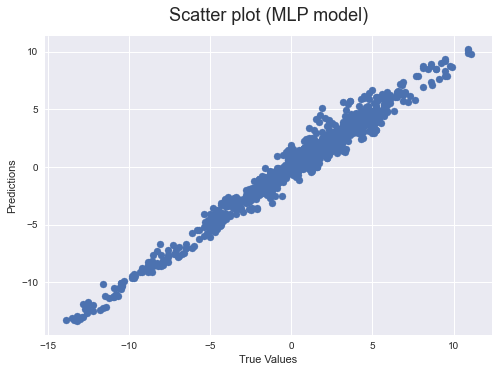

In [171]:
plt.scatter(y_test,NN_pred_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scatter plot (MLP model)',fontsize = 18, y = 1.03)

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

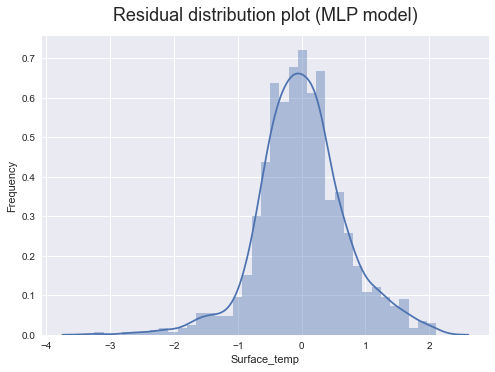

In [172]:
ax = sns.distplot(y_test-NN_pred_test)
ax.set_title('Residual distribution plot (MLP model)',fontsize = 18, y = 1.03)
ax.set_ylabel('Frequency')

In [173]:
train_sizes, train_scores, validation_scores = learning_curve(
estimator = MLPRegressor(activation='relu', solver='adam',max_iter=110,hidden_layer_sizes=(40,)),
X = X_train_ordered_scaled,
y = y_train, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\mha531\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer:

In [174]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-2.02473927e-02 -3.73097787e-01 -5.42645390e-04 -1.77745034e+00
  -4.07704019e-05]
 [-4.45298285e+00 -4.49987499e+00 -6.00870212e+00 -8.46666719e+00
  -1.01255841e+01]
 [-8.43272494e-01 -1.29263454e+00 -1.03153081e+00 -1.13769608e+00
  -1.18977955e+00]
 [-8.07118873e-01 -7.49147103e-01 -6.72889071e-01 -6.29503978e-01
  -6.78884409e-01]
 [-6.02799228e-01 -6.26998631e-01 -5.07765629e-01 -5.99766398e-01
  -5.42330414e-01]
 [-4.69468395e-01 -4.80970473e-01 -4.46834161e-01 -4.48213015e-01
  -4.95883439e-01]]

 ----------------------------------------------------------------------

Validation scores:

 [[-21.06634599 -11.93581344 -21.35661396 -14.39282793 -18.55784848]
 [ -6.24074523  -4.77162476  -6.60845443  -8.10219503 -10.11025181]
 [ -0.94097635  -1.50845291  -1.23662856  -1.20013568  -1.58436154]
 [ -0.8369964   -0.76441272  -0.78863243  -0.67812401  -0.87623493]
 [ -0.61494437  -0.63305033  -0.60893936  -0.62898734  -0.6415665 ]
 [ -0.45559246  -0.45610908  -0.529

In [175]:
train_scores_mean_dt = -train_scores.mean(axis = 1)
validation_scores_mean_dt = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_dt, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean_dt, index = train_sizes))

Mean training scores

 1       0.434276
100     6.710762
500     1.098983
1000    0.707509
1500    0.575932
2142    0.468274
dtype: float64

 --------------------

Mean validation scores

 1       17.461890
100      7.166654
500      1.294111
1000     0.788880
1500     0.625498
2142     0.489667
dtype: float64


(0.0, 5.0)

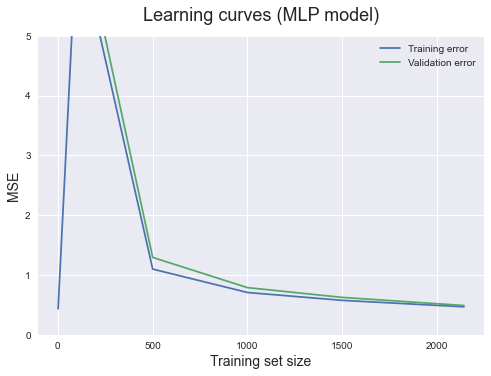

In [176]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean_dt, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean_dt, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves (MLP model)', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,5)